In [3]:
# import packages
import scimap as sm
import anndata as ad
import numpy as np

In [4]:
adata_2_4= ad.read_h5ad("/dss/dsshome1/00/ge65tib2/Scimap/2_4_ds_cellpose.h5ad")
adata_5_5= ad.read_h5ad("/dss/dsshome1/00/ge65tib2/Scimap/5_5_ds_cellpose.h5ad")


In [5]:
adata_2_4 = sm.tl.cluster(adata_2_4, method='leiden', resolution=0.7, use_raw=False, log=False)


Leiden clustering


/dss/dsshome1/00/ge65tib2/miniconda3/envs/scimap/lib/python3.10/site-packages/scanpy/preprocessing/_pca/__init__.py:383: ImplicitModificationWarning:

Setting element `.obsm['X_pca']` of view, initializing view as actual.

/dss/dsshome1/00/ge65tib2/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/cluster.py:174: FutureWarning:

In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.



In [6]:
adata_5_5 = sm.tl.cluster(adata_5_5, method='leiden', resolution=0.7, use_raw=False, log=False)


Leiden clustering


/dss/dsshome1/00/ge65tib2/miniconda3/envs/scimap/lib/python3.10/site-packages/scanpy/preprocessing/_pca/__init__.py:383: ImplicitModificationWarning:

Setting element `.obsm['X_pca']` of view, initializing view as actual.



In [7]:
adata_2_4.obs['leiden'].value_counts()


leiden
0     1185
1      825
2      768
3      708
4      648
5      612
6      609
7      474
8      449
9      394
10     195
11     122
12      91
13      73
Name: count, dtype: int64

In [8]:
adata_5_5.obs['leiden'].value_counts()


leiden
0     1291
1     1002
2      982
3      943
4      869
5      848
6      795
7      766
8      759
9      749
10     659
11     566
12     558
13      40
Name: count, dtype: int64

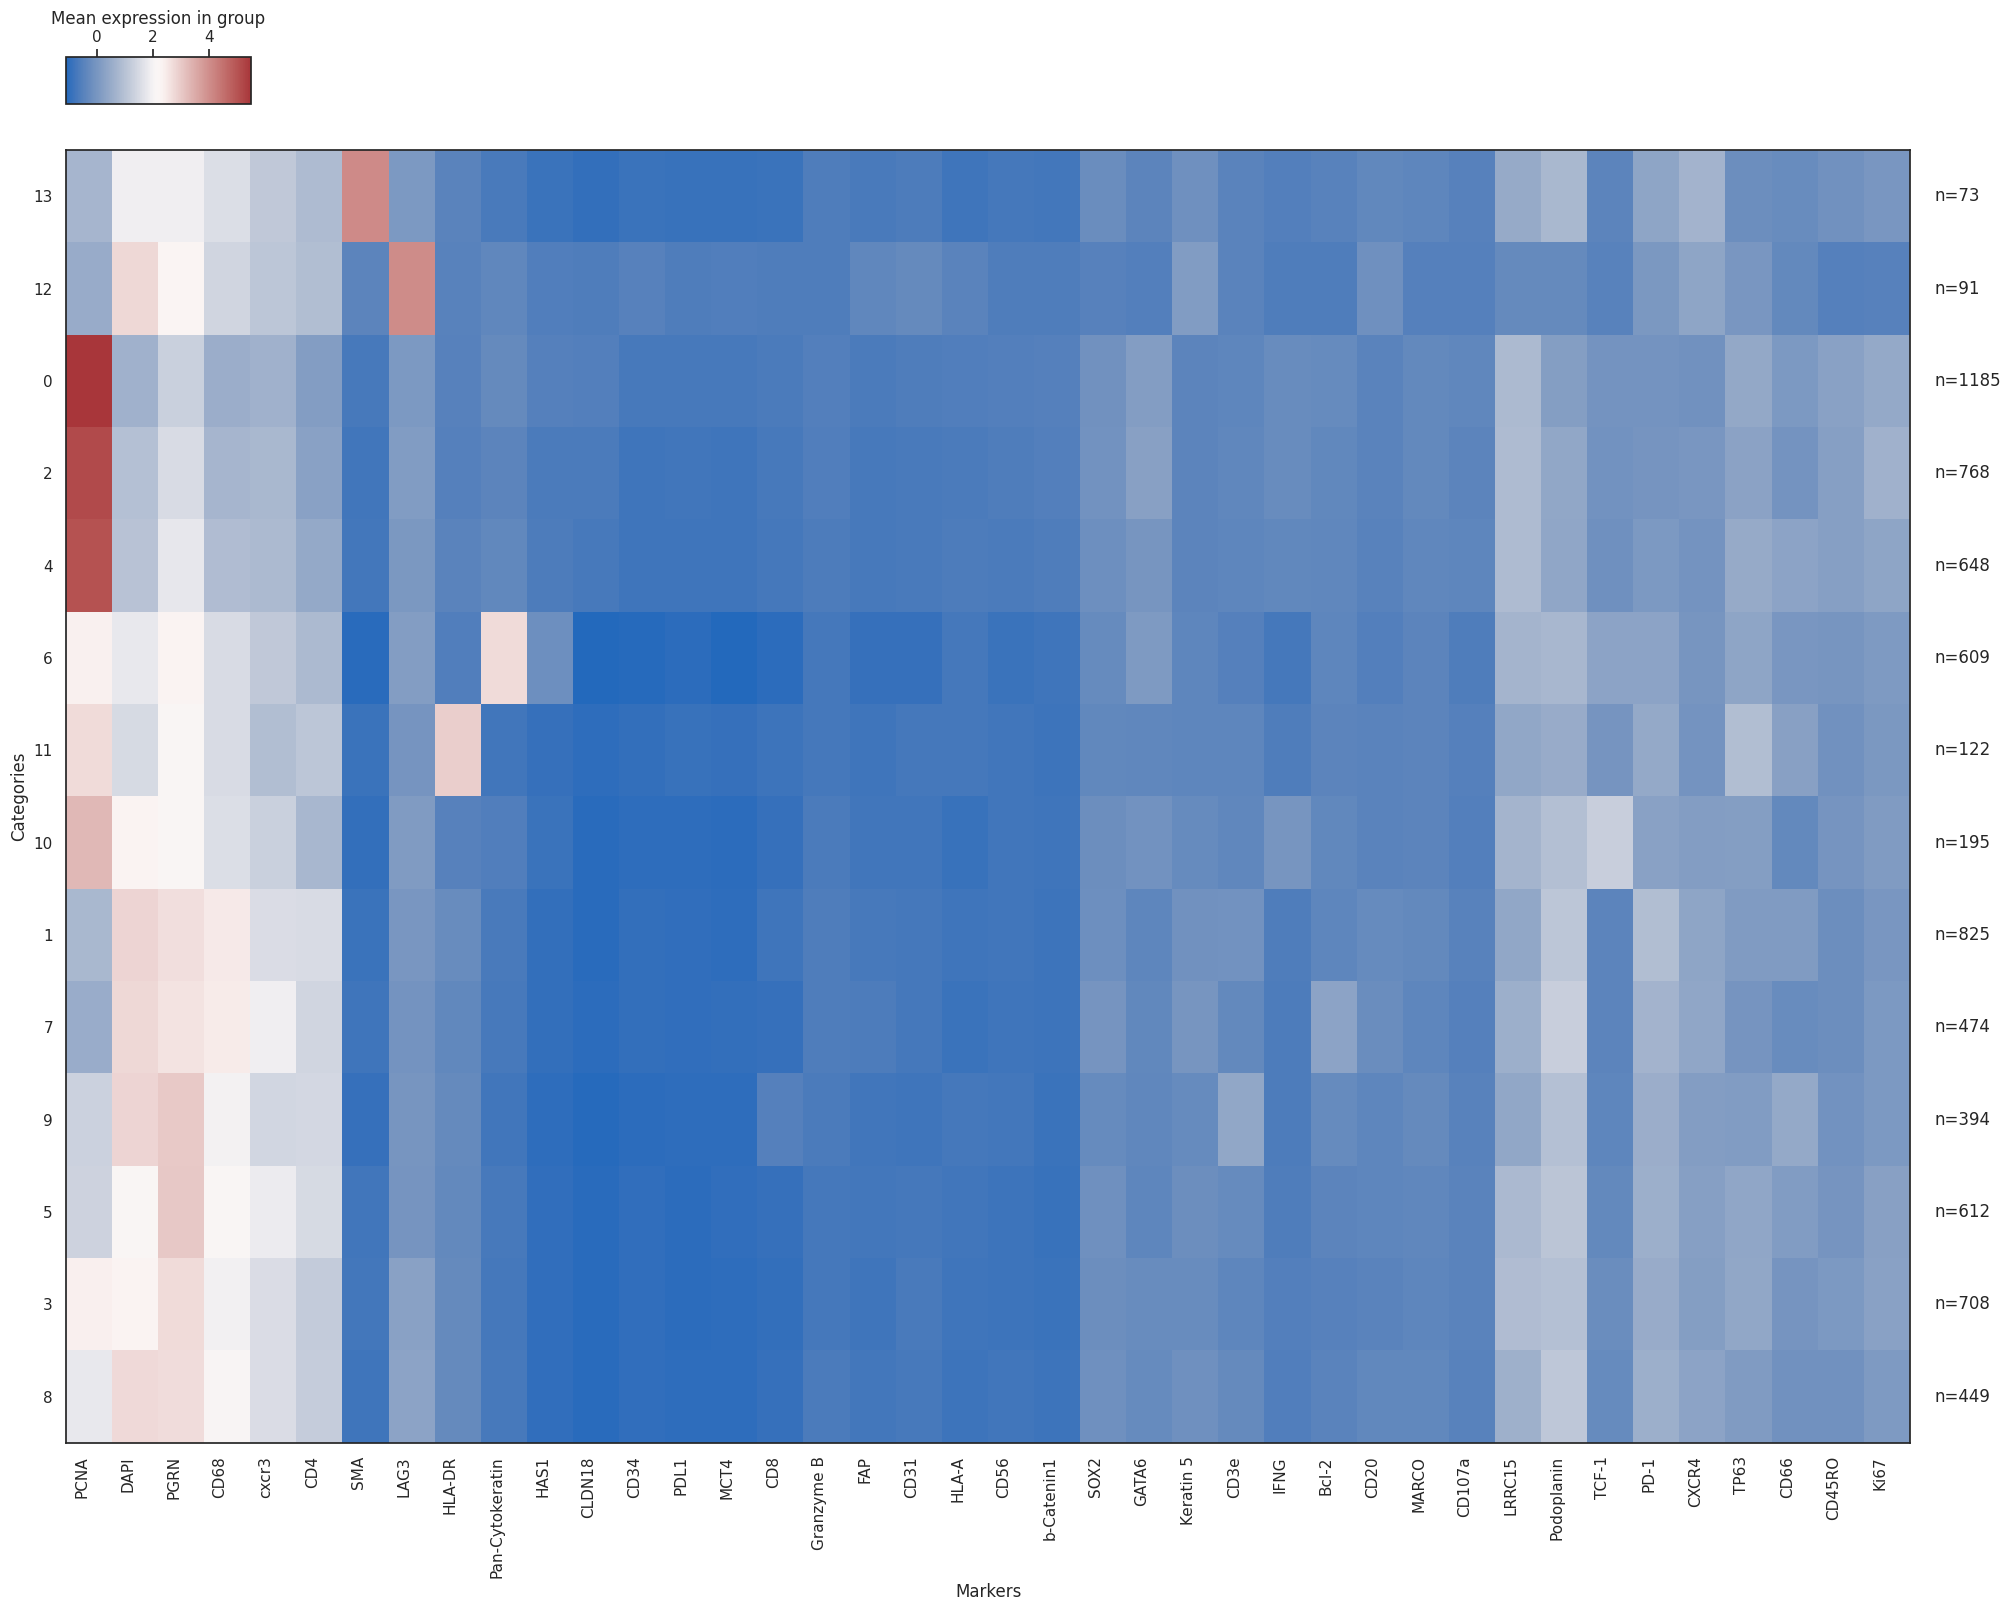

In [9]:
sm.pl.heatmap(adata_2_4, groupBy='leiden', standardScale='column', figsize=(20,16), showPrevalence=True)


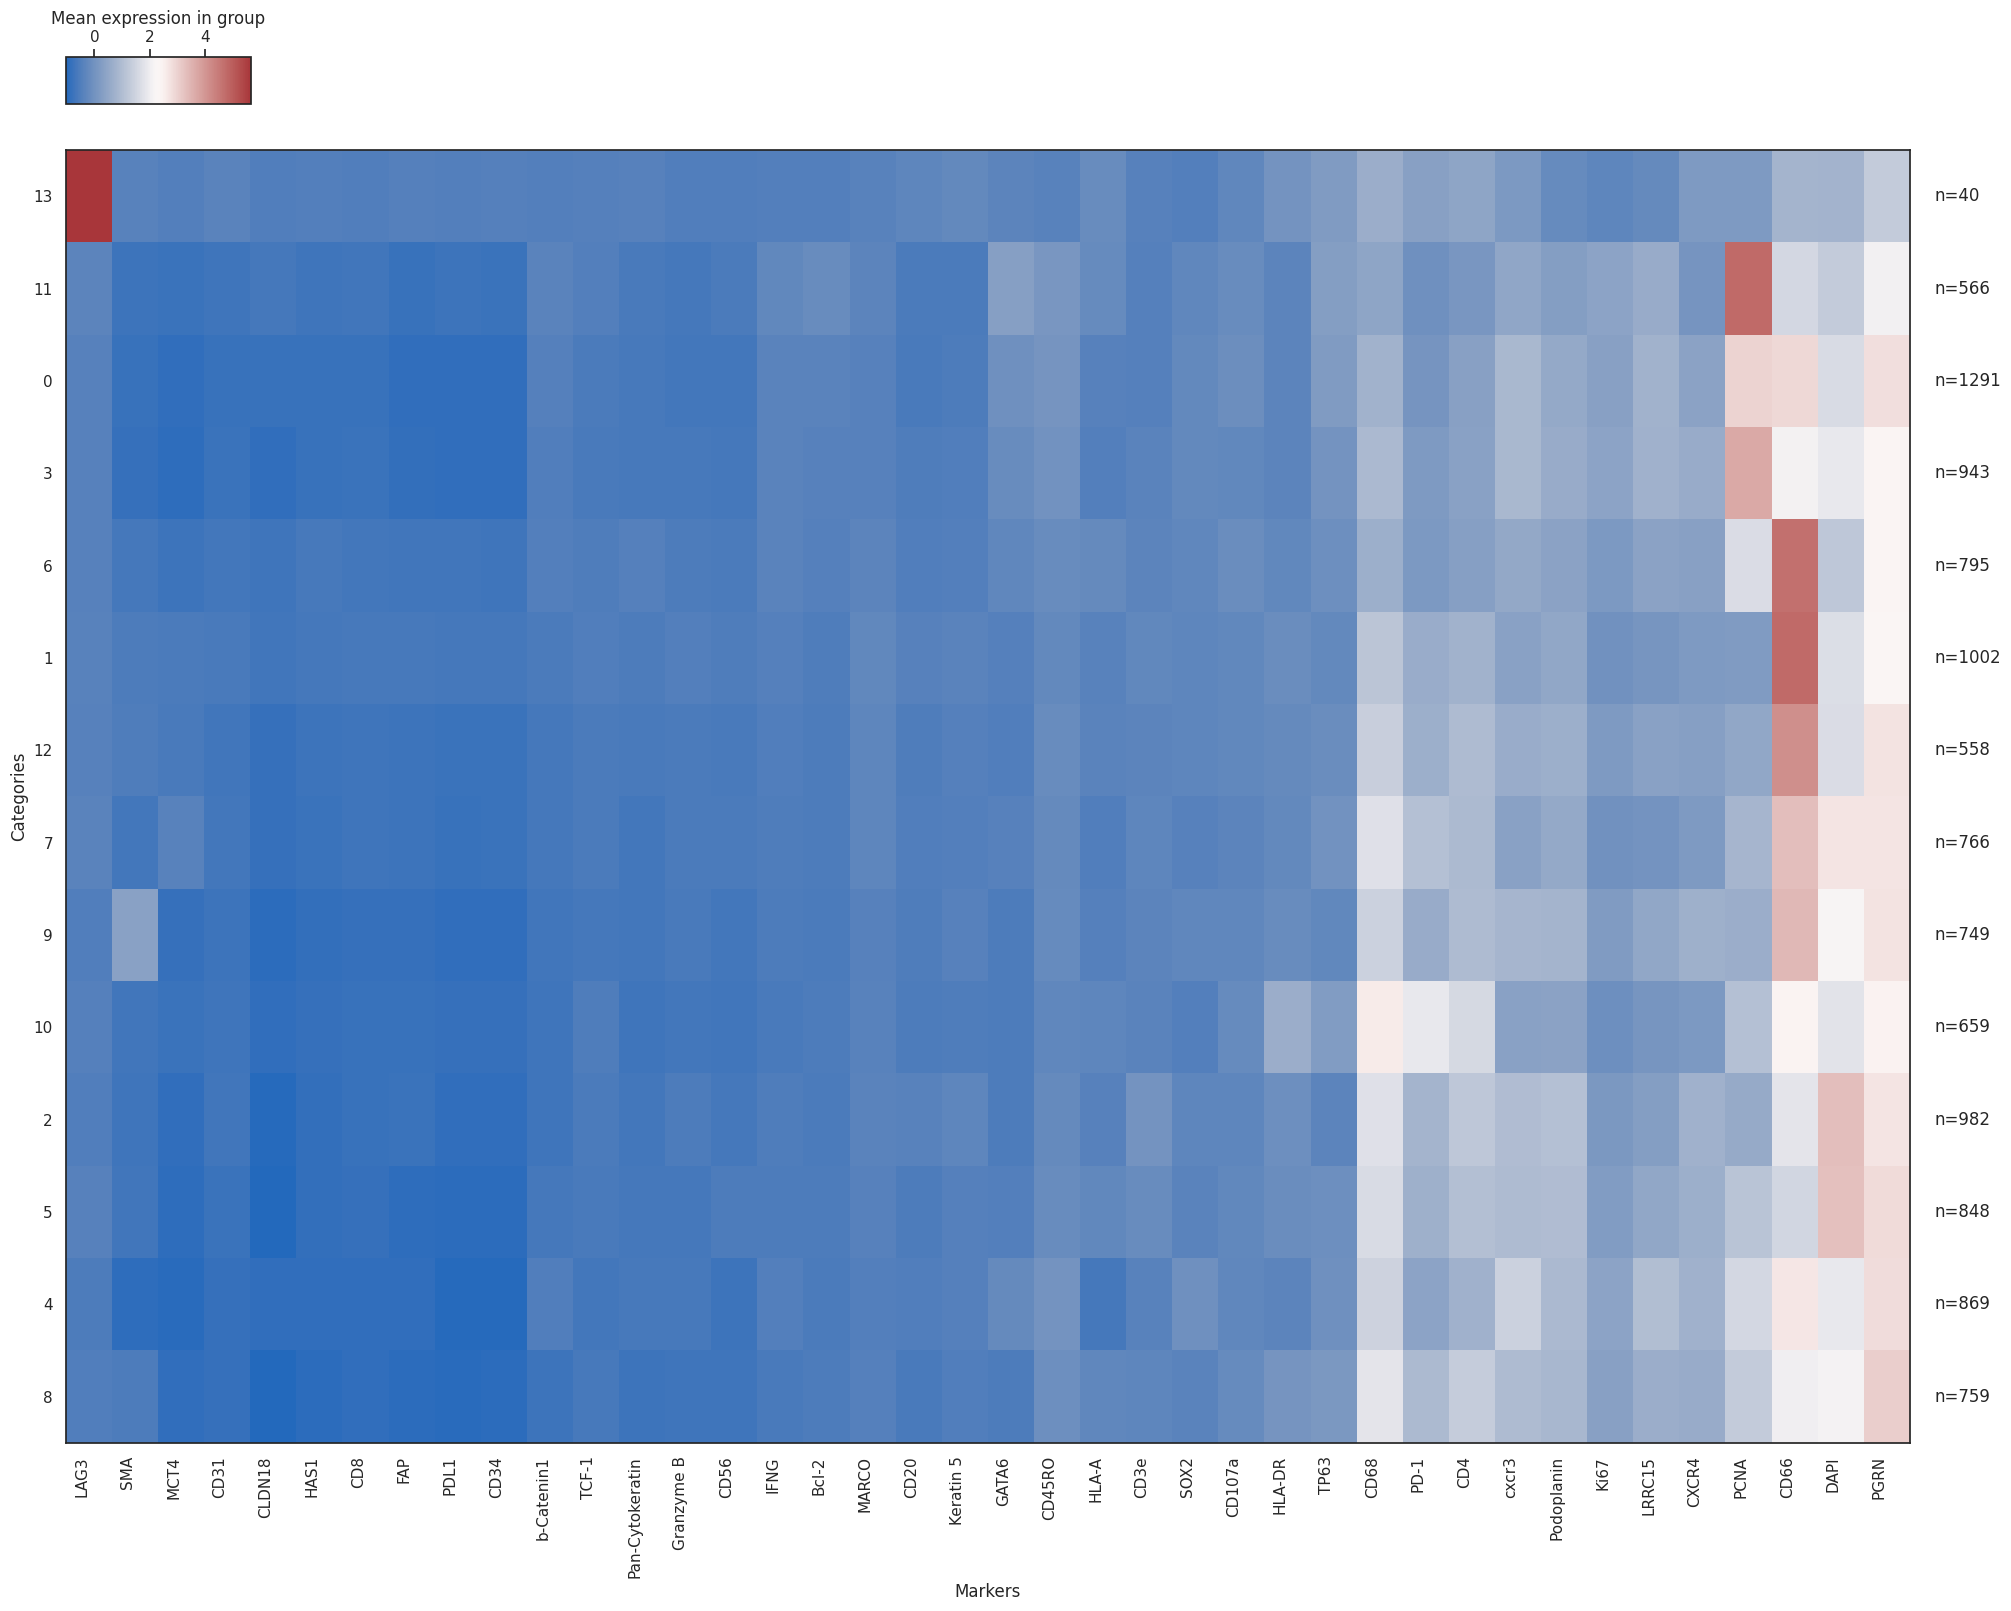

In [10]:
sm.pl.heatmap(adata_5_5, groupBy='leiden', standardScale='column', figsize=(20,16), showPrevalence=True)


In [74]:
rename_dict_2_4 = {
    'Tumor and CAF': ['0', '5', '7'],
    'Tumor, CAF and Immune': ['1'],
    'Vessels and Fibroblast': ['3'],
    'NK cells': ['9'],
    'CD8⁺ T cells': ['6'],
    'T cells and Macrophages': ['4'],
    'Immune': ['2'],
    'BCL-2-dominant': ['8']
}
adata_2_4 = sm.hl.rename(adata_2_4, rename=rename_dict_2_4, from_column='leiden', to_column='leiden_phenotype')

Renaming 0 to Tumor and CAF
Renaming 5 to Tumor and CAF
Renaming 7 to Tumor and CAF
Renaming 1 to Tumor, CAF and Immune
Renaming 3 to Vessels and Fibroblast
Renaming 9 to NK cells
Renaming 6 to CD8⁺ T cells
Renaming 4 to T cells and Macrophages
Renaming 2 to Immune
Renaming 8 to BCL-2-dominant


In [75]:
rename_dict_5_5 = {'Tumor': [ '6', '0'],
               'Vessels and Fibroblast': ['4'],
                   'Artifacts': ['7'],
                   'CAF, Immune and Epithelial': ['2'],
                   'Epithelial': ['3'],
                   'Macrophages': ['1'],
                   'CD8⁺ T cells': ['8'],
                'Immune': ['5']}
adata_5_5 = sm.hl.rename(adata_5_5, rename=rename_dict_5_5, from_column='leiden', to_column='leiden_phenotype')

Renaming 6 to Tumor
Renaming 0 to Tumor
Renaming 4 to Vessels and Fibroblast
Renaming 7 to Artifacts
Renaming 2 to CAF, Immune and Epithelial
Renaming 3 to Epithelial
Renaming 1 to Macrophages
Renaming 8 to CD8⁺ T cells
Renaming 5 to Immune


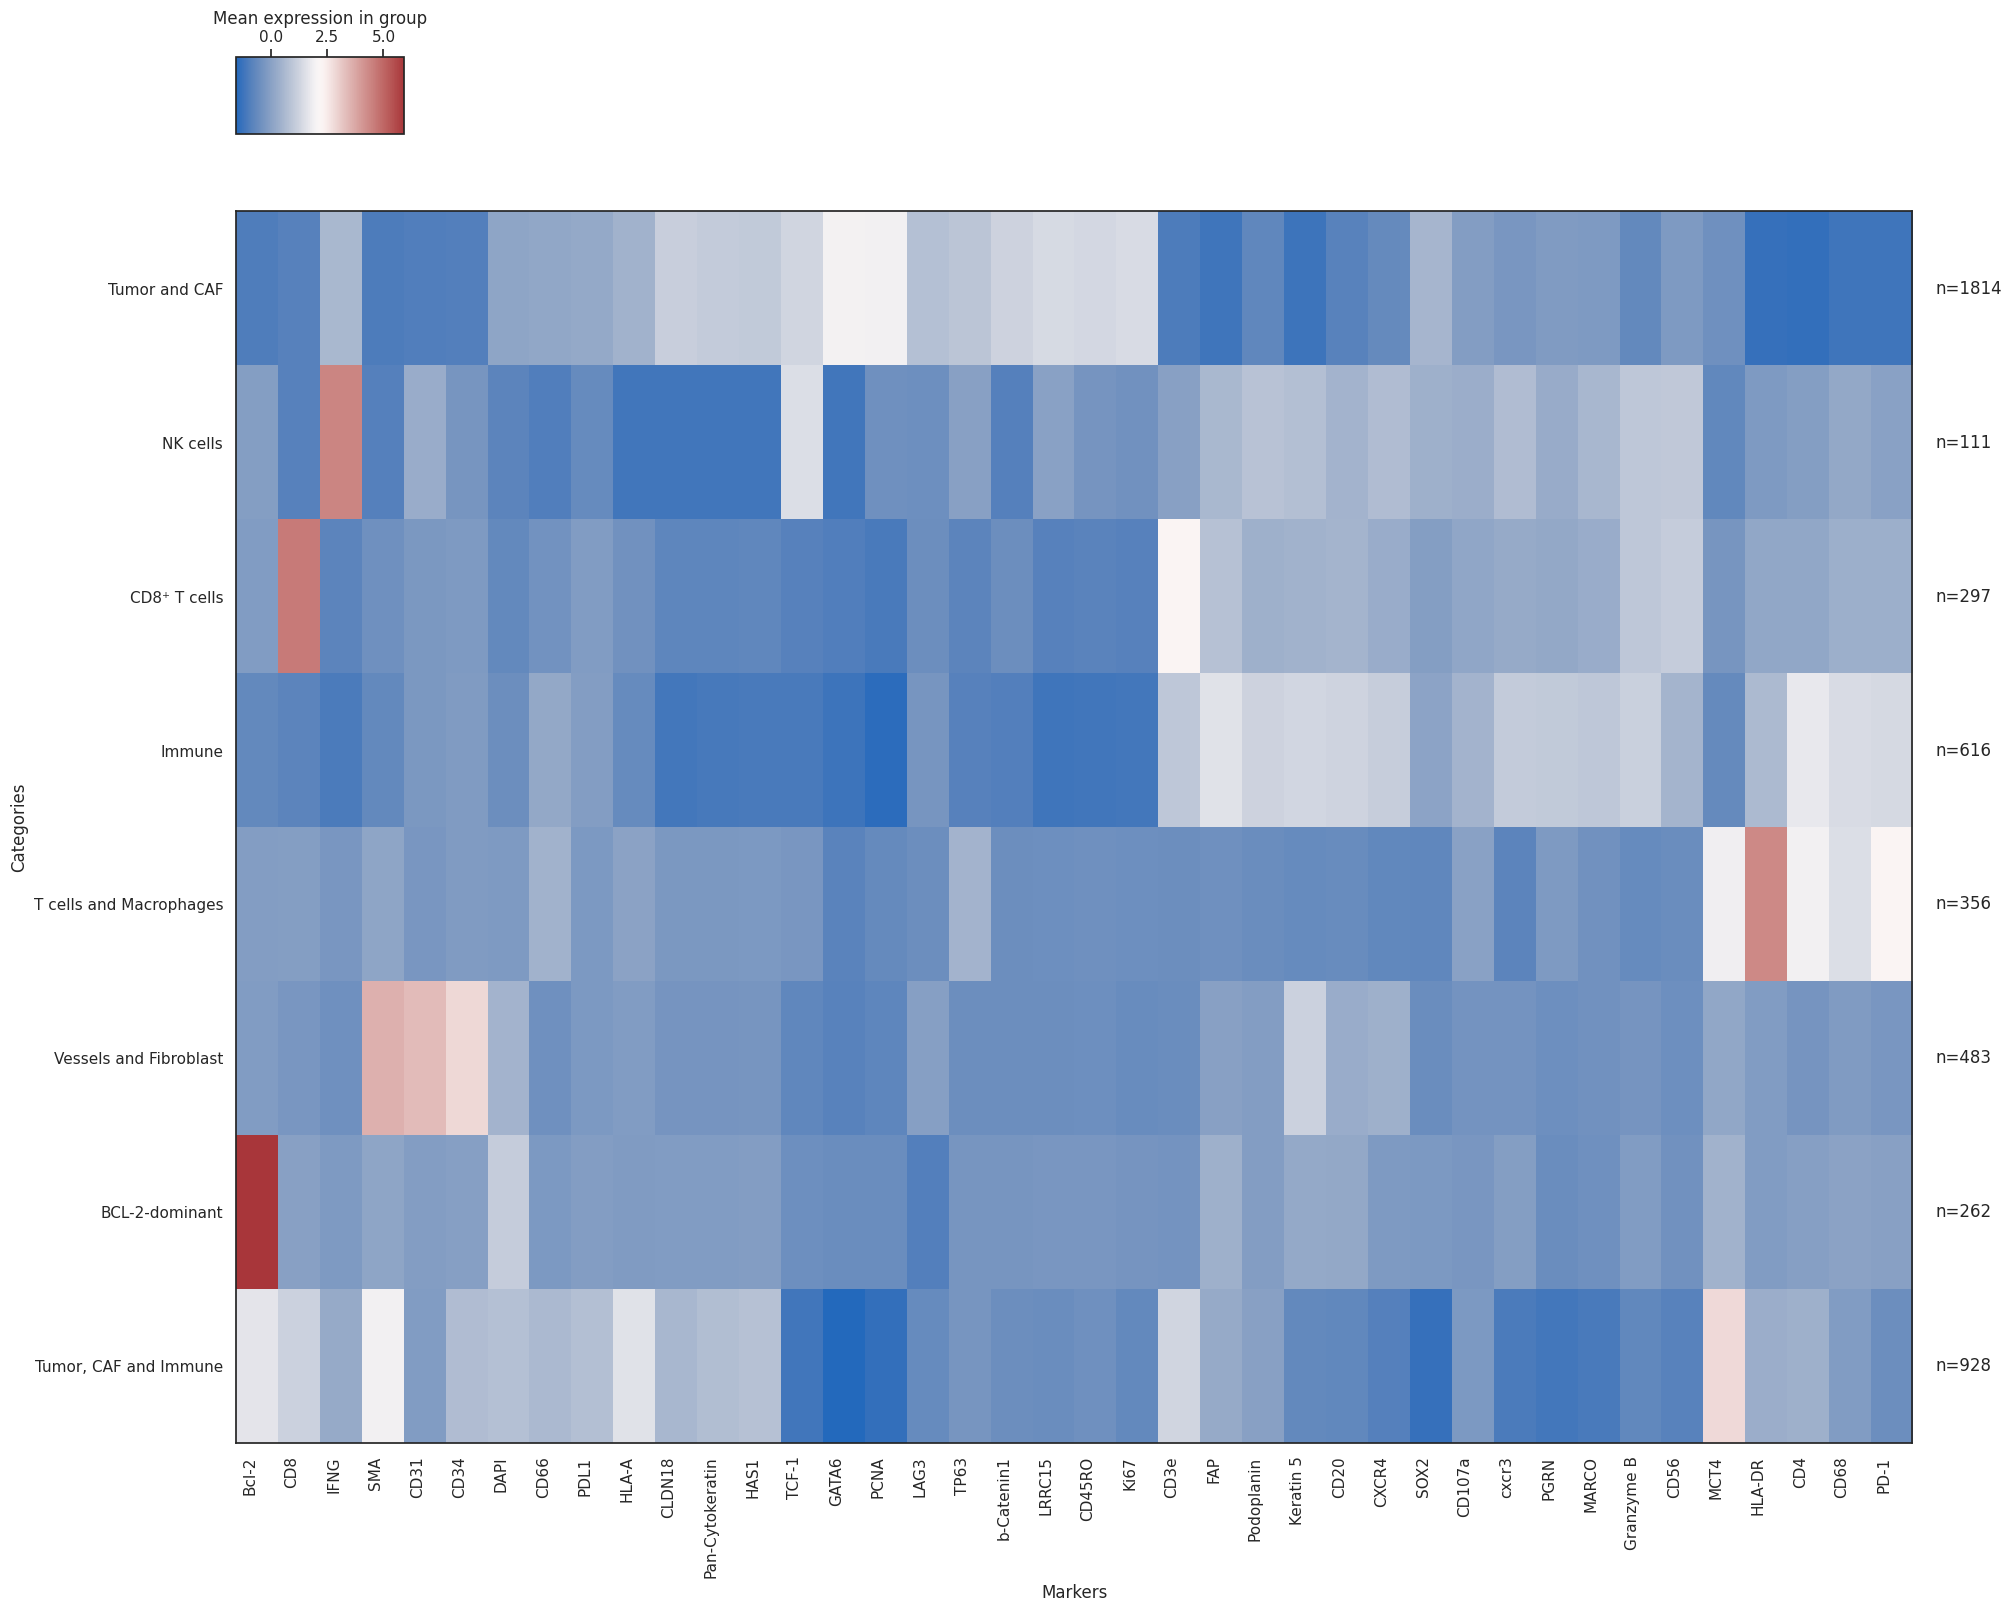

In [76]:
sm.pl.heatmap(adata_2_4, groupBy='leiden_phenotype', standardScale='column', figsize=(20,16), showPrevalence=True)


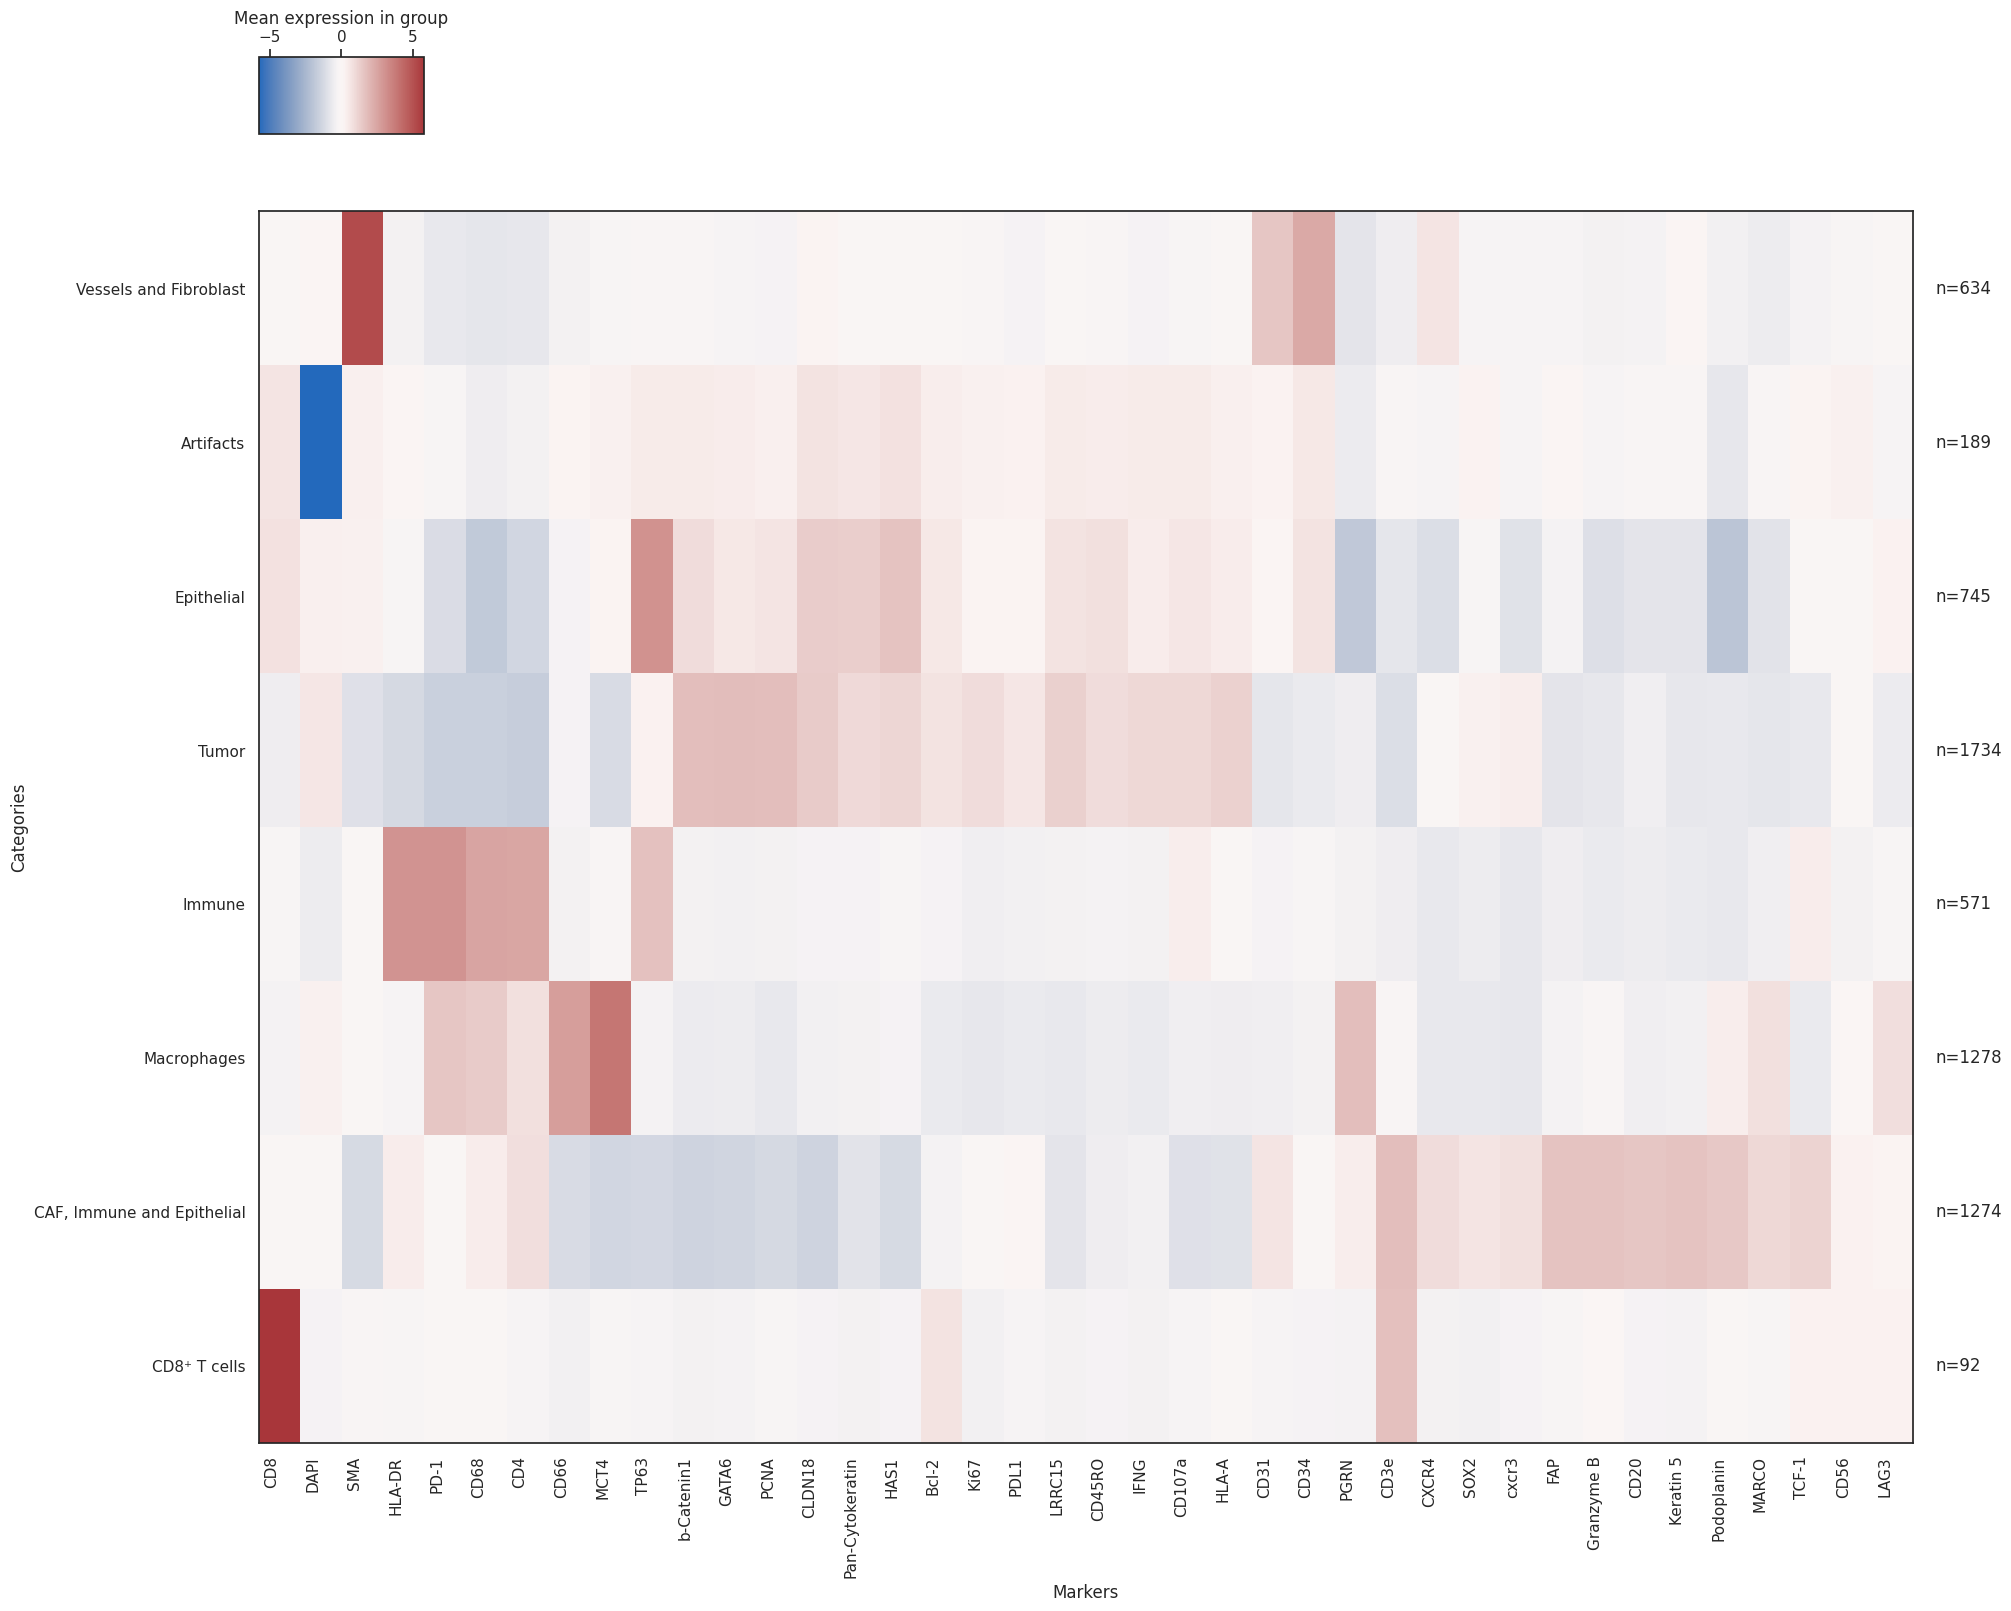

In [77]:
sm.pl.heatmap(adata_5_5, groupBy='leiden_phenotype', standardScale='column', figsize=(20,16), showPrevalence=True)


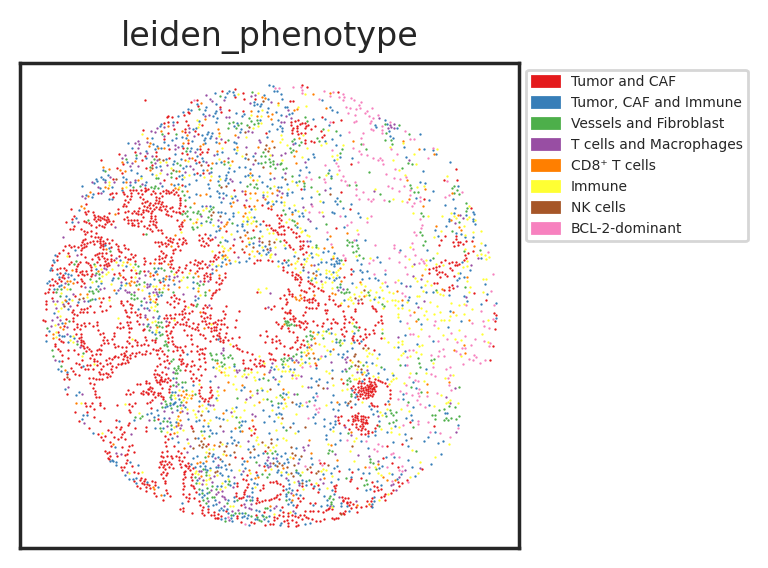

In [80]:
sm.pl.spatial_scatterPlot(
    adata_2_4,
    colorBy=['leiden_phenotype'],
    x_coordinate='centroid-0',
    y_coordinate='centroid-1',
    figsize=(4,3),
    s=0.7,
    fontsize=5,
    catCmap='Set1'
)


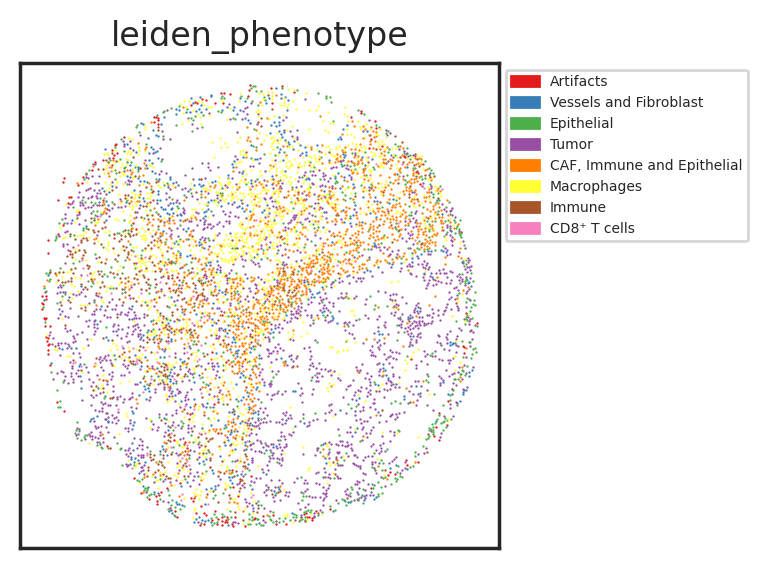

In [81]:
sm.pl.spatial_scatterPlot(
    adata_5_5,
    colorBy=['leiden_phenotype'],
    x_coordinate='centroid-0',
    y_coordinate='centroid-1',
    figsize=(4,3),
    s=0.7,
    fontsize=5,
    catCmap='Set1'
)


In [90]:
adata_2_4.write('/dss/dsshome1/00/ge65tib2/Scimap/2_4_scimap.h5ad')
adata_5_5.write('/dss/dsshome1/00/ge65tib2/Scimap/5_5_scimap.h5ad')